In [238]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/whats-cooking-kernels-only/sample_submission.csv
/kaggle/input/whats-cooking-kernels-only/test.json
/kaggle/input/whats-cooking-kernels-only/train.json


In [239]:
train_set = pd.read_json('/kaggle/input/whats-cooking-kernels-only/train.json')
test_set = pd.read_json('/kaggle/input/whats-cooking-kernels-only/test.json')

In [240]:
train_set.head()

,id,cuisine,ingredients
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes..."
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g..."
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,22213,indian,"[water, vegetable oil, wheat, salt]"
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe..."


In [241]:
print('Number of cuisines: {}'.format(len(train_set['cuisine'].unique())))

Number of cuisines: 20


In [242]:
num_cuisine = pd.DataFrame(train_set['cuisine'].value_counts())
num_cuisine.columns = ['counts']
num_cuisine.index.names = ['cuisine']
num_cuisine.head()

,counts
cuisine,
italian,7838
mexican,6438
southern_us,4320
indian,3003
chinese,2673


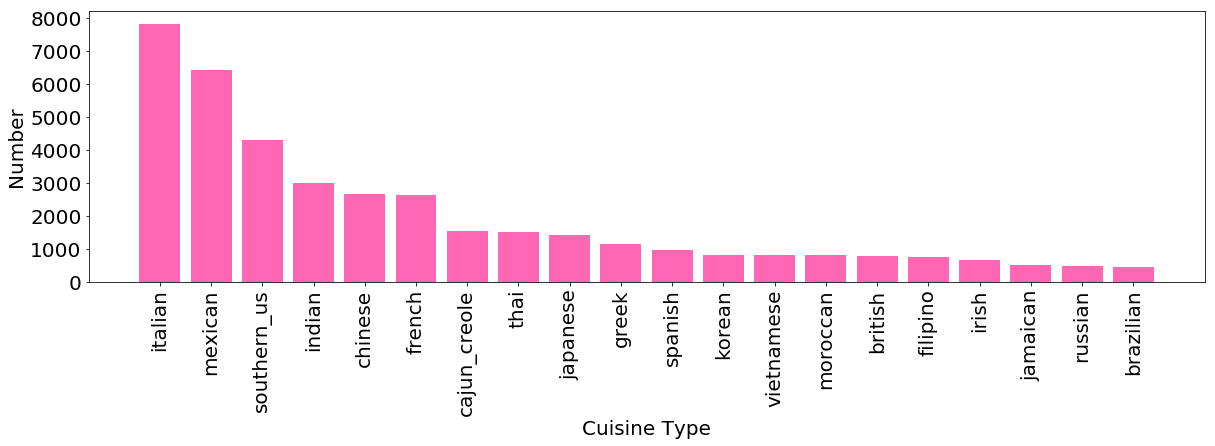

In [243]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))

plt.bar(num_cuisine.index, num_cuisine['counts'], color = (1,.4,0.7))
plt.xticks(rotation = 90, fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlabel('Cuisine Type', fontsize=20)
plt.ylabel('Number', fontsize=20)
plt.show()

In [244]:
train_set.head()

,id,cuisine,ingredients
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes..."
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g..."
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,22213,indian,"[water, vegetable oil, wheat, salt]"
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe..."


In [245]:
import re

In [246]:
def find_words(column,name):
    
    """
    Function to search for difference occrances of a given word
    column in train_set
    name is string to search for 
        """
    word = name
    occ_list = []
    for n , val in enumerate(column):
        for i, item in enumerate(val):
            word_split = item.split()
            for a in word_split:
                if word in a:
                    if a not in occ_list:
                        occ_list.append(item)
    return occ_list

In [247]:
find_words(train_set['ingredients'],'onion')[0:5]

['purple onion', 'yellow onion', 'onions', 'purple onion', 'purple onion']

In [248]:
train_set['replace_items'] = train_set['ingredients']

In [249]:
train_set.head()

,id,cuisine,ingredients,replace_items
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes...","[romaine lettuce, black olives, grape tomatoes..."
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g...","[plain flour, ground pepper, salt, tomatoes, g..."
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g...","[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,22213,indian,"[water, vegetable oil, wheat, salt]","[water, vegetable oil, wheat, salt]"
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe...","[black pepper, shallots, cornflour, cayenne pe..."


In [250]:
def replace_item(word_in_list,replacement):
    for n , val in enumerate(train_set['replace_items']):
        for i, item in enumerate(val):
            if item == word_in_list:
                train_set['replace_items'][n][i] = replacement


In [251]:
word = 'onion'
item = []
for n, val in enumerate(train_set['replace_items']):
    for i, ingredient in enumerate(val):
        if word in ingredient:
            item.append([train_set['cuisine'][n],ingredient])




In [252]:
cui_ing = pd.DataFrame(item)
cui_ing.columns = ['cuisine','ingredient']
cui_ing.head()

,cuisine,ingredient
0,greek,purple onion
1,filipino,yellow onion
2,indian,onions
3,mexican,purple onion
4,mexican,onions


In [253]:
cui_ing.groupby('ingredient').count().sort_values('cuisine',ascending = False)[0:15] 

,cuisine
ingredient,
onions,7972
green onions,3078
purple onion,1896
chopped onion,1251
yellow onion,1184
white onion,684
onion powder,528
sliced green onions,472
finely chopped onion,457


In [254]:
cui_uni_ing = cui_ing[cui_ing['ingredient'] == 'purple onion']
cui_uni_ing['cuisine'].unique()

array(['greek', 'mexican', 'moroccan', 'indian', 'french', 'filipino',
       'jamaican', 'italian', 'thai', 'southern_us', 'cajun_creole',
       'vietnamese', 'spanish', 'irish', 'chinese', 'russian',
       'brazilian', 'japanese', 'korean', 'british'], dtype=object)

In [255]:
onion = ['purple onion', 'chopped onion','yellow onion', 'diced onion','diced onions','onions','minced onion',
         'diced red onion','finely chopped onion','white onion','diced yellow onion','fresh onion','maui onion',
         'onion slices','small yellow onion','bermuda onion', 'vidalia onion','sweet onion',
        'diced red onion','spanish onion','diced red onions','boiling onions','boiling onions']

In [256]:
green_onion =['spring onion','spring onions','sliced green onions', 'green onions','onion tops','green onion bottoms']

In [257]:
onion_flakes = ['dried minced onion']

In [258]:
onion_rings = ['frozen onion rings','french fried onions']

In [259]:
onion_soup_mix = ['lipton onion soup mix','lipton recip secret golden onion soup mix']

In [260]:
french_onion_soup = ['condensed french onion soup','onion soup']

In [261]:
pearl_onion = ['pearl onions', 'cipollini onions']

In [262]:
for n , val in enumerate(onion):
    replace_item(val, 'onion')
    
for n , val in enumerate(green_onion):
    replace_item(val, 'green onion')

for n, val in enumerate(onion_flakes):
    replace_item(val,'onion flakes')
    
for n, val in enumerate(onion_rings):
    replace_item(val,'onion rings')
    
for n, val in enumerate(onion_soup_mix):
    replace_item(val,'onion soup mix')
    
for n, val in enumerate(pearl_onion):
    replace_item(val,'pearl onion')
    
for n, val in enumerate(french_onion_soup):
    replace_item(val,'french onion soup')

In [263]:
def cuisine_word (word):
    item = []
    for n, val in enumerate(train_set['replace_items']):
        for i, ingredient in enumerate(val):
            if word in ingredient:
                item.append([train_set['cuisine'][n],ingredient])
    return item


In [264]:
pepper_list = pd.DataFrame(cuisine_word('pepper'))
pepper_list.columns = ['cuisine','ingredient']

In [265]:
pepper_list.groupby('ingredient').count().sort_values('cuisine',ascending = False)[0:10]

,cuisine
ingredient,
ground black pepper,4785
pepper,4438
black pepper,2627
red bell pepper,1939
cayenne pepper,1523
green bell pepper,1180
freshly ground pepper,949
crushed red pepper,825
red pepper flakes,669


In [266]:
bell_pepper = ['red bell pepper','green bell pepper','red pepper','crushed red pepper','red pepper','green pepper','yellow bell pepper',
               'chopped green bell pepper','roasted red peppers','orange bell pepper','sweet pepper','yellow peppers','green bell pepper, slice',
               'roast red peppers, drain','lemon pepper','chopped bell pepper','diced bell pepper','red bell pepper, sliced',
               'mixed bell peppers','green bellpepper','roasted bell peppers']

black_peppercorn = ['black pepper','freshly ground pepper','black peppercorns','cracked black pepper','peppercorns','green peppercorns',
                    'whole peppercorn','coarse ground black pepper','blackpepper','ground black pepper','ground pepper']


In [267]:
pepperoni = ['hot pepperoni','mini pepperoni slices','pepperoni','pepperoni turkei','pepperoni slices']

In [268]:
for n , val in enumerate(bell_pepper):
    replace_item(val, 'bell pepper')

In [269]:
for n , val in enumerate(black_peppercorn):
    replace_item(val, 'black pepper')

In [270]:
for n , val in enumerate(pepperoni):
    replace_item(val, 'pepperoni')

In [271]:
sauce_list = pd.DataFrame(cuisine_word('sauce'))
sauce_list.columns = ['cuisine','ingredient']

In [272]:
sauce_list.groupby('ingredient').count().sort_values('cuisine',ascending = False)[0:10]

,cuisine
ingredient,
soy sauce,3296
fish sauce,1247
tomato sauce,865
worcestershire sauce,688
hot sauce,674
sauce,458
oyster sauce,455
hoisin sauce,429
low sodium soy sauce,425


In [273]:
tomato_sauce = ['pasta sauce', 'pizza sauce','tomato basil sauce','low-fat pasta sauce','prepared pasta sauce','( oz.) tomato sauce',
               'low-fat spaghetti sauce','chunky pasta sauce','tomato sauce low sodium','low sodium tomato sauce','sauce tomato',
                'chunky tomato sauce','marinara sauce']

In [274]:
bbq_sauce = ['bbq sauce','barbecue sauce']

In [275]:
worcestershire_sauce = ['low sodium worcestershire sauce','vegan Worcestershire sauce']

In [276]:
soy_sauce = ['low sodium soy sauce','light soy sauce','dark soy sauce','reduced sodium soy sauce','regular soy sauce','lower sodium soy sauce',
            'gluten free soy sauce','less sodium soy sauce']

In [277]:
for n , val in enumerate(bbq_sauce):
    replace_item(val, 'barbecue sauce')

In [278]:
for n , val in enumerate(worcestershire_sauce):
    replace_item(val, 'worcestershire sauce')

In [279]:
for n , val in enumerate(soy_sauce):
    replace_item(val, 'soy sauce')

In [280]:
for n , val in enumerate(tomato_sauce):
    replace_item(val, 'tomato sauce')

In [281]:
# test stop word remove function
test_list1 = pd.DataFrame(find_words(train_set['ingredients'],'with'))[0:10]
test_list2 = pd.DataFrame(find_words(train_set['ingredients'],'and'))[0:10]
tests = [test_list1,test_list2]
test_list=pd.concat(tests,ignore_index=True)
test_list.columns= ['ingredient']
test_list[:15]

,ingredient
0,chili paste with garlic
1,bertolli vineyard premium collect marinara wit...
2,tomatoes with juice
3,diced tomatoes with garlic and onion
4,tomatoes with juice
5,tomatoes with juice
6,black bean sauce with garlic
7,tomatoes with juice
8,tomatoes with juice
9,tomatoes with juice


In [282]:
import nltk
stopwords = nltk.corpus.stopwords.words('english')

In [283]:
list_items = test_list['ingredient'][0:5]
items=[]
for n, word_list in enumerate(list_items):
    word_split = word_list.split()
    for word in word_split:
        if word in stopwords:
            word_split.remove(word)
    word_list = ' '.join(word_split)
    items.append(word_list)
items = pd.DataFrame(items)

In [284]:
def remove_stopwords(list_items, stopwords):
    for n, word_list in enumerate(list_items):
        for i, val in enumerate(word_list):
            word_split = re.split('\W+',val)
            for word in word_split:
                if word in stopwords:
                    word_split.remove(word)
                val = ' '.join(word_split)                    
            list_items[n][i] = val


In [285]:
remove_stopwords(train_set['replace_items'],stopwords)

In [286]:
train_set.head(10)

,id,cuisine,ingredients,replace_items
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes...","[romaine lettuce, black olives, grape tomatoes..."
1,25693,southern_us,"[plain flour, black pepper, salt, tomatoes, bl...","[plain flour, black pepper, salt, tomatoes, bl..."
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g...","[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,22213,indian,"[water, vegetable oil, wheat, salt]","[water, vegetable oil, wheat, salt]"
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe...","[black pepper, shallots, cornflour, cayenne pe..."
5,6602,jamaican,"[plain flour, sugar, butter, eggs, fresh ginge...","[plain flour, sugar, butter, eggs, fresh ginge..."
6,42779,spanish,"[olive oil, salt, medium shrimp, pepper, garli...","[olive oil, salt, medium shrimp, pepper, garli..."
7,3735,italian,"[sugar, pistachio nuts, white almond bark, flo...","[sugar, pistachio nuts, white almond bark, flo..."
8,16903,mexican,"[olive oil, onion, fresh pineapple, pork, pobl...","[olive oil, onion, fresh pineapple, pork, pobl..."
9,12734,italian,"[chopped tomatoes, fresh basil, garlic, extra ...","[chopped tomatoes, fresh basil, garlic, extra ..."


In [287]:
test = []
(test.extend(train_set['replace_items'][1][1].split()))
test

['black', 'pepper']

In [288]:
import re

def tokenize(text):
    tokens = []
    for n , val in enumerate(text):
        word = val.lower()
        tokens.extend(re.split('\W+',word))
                
    return  tokens



train_set['text_tokenized'] = train_set['replace_items'].apply(lambda x: tokenize(x) )

train_set.head()

,id,cuisine,ingredients,replace_items,text_tokenized
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes...","[romaine lettuce, black olives, grape tomatoes...","[romaine, lettuce, black, olives, grape, tomat..."
1,25693,southern_us,"[plain flour, black pepper, salt, tomatoes, bl...","[plain flour, black pepper, salt, tomatoes, bl...","[plain, flour, black, pepper, salt, tomatoes, ..."
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g...","[eggs, pepper, salt, mayonaise, cooking oil, g...","[eggs, pepper, salt, mayonaise, cooking, oil, ..."
3,22213,indian,"[water, vegetable oil, wheat, salt]","[water, vegetable oil, wheat, salt]","[water, vegetable, oil, wheat, salt]"
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe...","[black pepper, shallots, cornflour, cayenne pe...","[black, pepper, shallots, cornflour, cayenne, ..."


In [289]:
ps = nltk.PorterStemmer()

train_set['stem_text'] = train_set['text_tokenized'].apply(lambda x: [ps.stem(word) for word in x])

In [290]:
train_set.head(20)

,id,cuisine,ingredients,replace_items,text_tokenized,stem_text
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes...","[romaine lettuce, black olives, grape tomatoes...","[romaine, lettuce, black, olives, grape, tomat...","[romain, lettuc, black, oliv, grape, tomato, g..."
1,25693,southern_us,"[plain flour, black pepper, salt, tomatoes, bl...","[plain flour, black pepper, salt, tomatoes, bl...","[plain, flour, black, pepper, salt, tomatoes, ...","[plain, flour, black, pepper, salt, tomato, bl..."
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g...","[eggs, pepper, salt, mayonaise, cooking oil, g...","[eggs, pepper, salt, mayonaise, cooking, oil, ...","[egg, pepper, salt, mayonais, cook, oil, green..."
3,22213,indian,"[water, vegetable oil, wheat, salt]","[water, vegetable oil, wheat, salt]","[water, vegetable, oil, wheat, salt]","[water, veget, oil, wheat, salt]"
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe...","[black pepper, shallots, cornflour, cayenne pe...","[black, pepper, shallots, cornflour, cayenne, ...","[black, pepper, shallot, cornflour, cayenn, pe..."
5,6602,jamaican,"[plain flour, sugar, butter, eggs, fresh ginge...","[plain flour, sugar, butter, eggs, fresh ginge...","[plain, flour, sugar, butter, eggs, fresh, gin...","[plain, flour, sugar, butter, egg, fresh, ging..."
6,42779,spanish,"[olive oil, salt, medium shrimp, pepper, garli...","[olive oil, salt, medium shrimp, pepper, garli...","[olive, oil, salt, medium, shrimp, pepper, gar...","[oliv, oil, salt, medium, shrimp, pepper, garl..."
7,3735,italian,"[sugar, pistachio nuts, white almond bark, flo...","[sugar, pistachio nuts, white almond bark, flo...","[sugar, pistachio, nuts, white, almond, bark, ...","[sugar, pistachio, nut, white, almond, bark, f..."
8,16903,mexican,"[olive oil, onion, fresh pineapple, pork, pobl...","[olive oil, onion, fresh pineapple, pork, pobl...","[olive, oil, onion, fresh, pineapple, pork, po...","[oliv, oil, onion, fresh, pineappl, pork, pobl..."
9,12734,italian,"[chopped tomatoes, fresh basil, garlic, extra ...","[chopped tomatoes, fresh basil, garlic, extra ...","[chopped, tomatoes, fresh, basil, garlic, extr...","[chop, tomato, fresh, basil, garlic, extra, vi..."


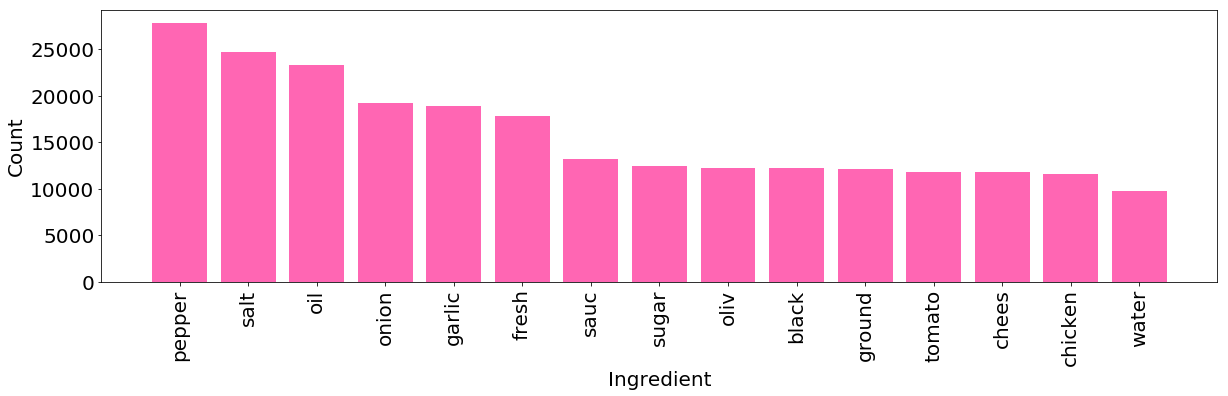

In [291]:
from collections import Counter

#visualize most common ingredients across all cuisine types
allingred = []
for word in train_set['stem_text']:
    for val in word:
        allingred.append(val)
# Count how many times each ingredient occurs
wordfreq = Counter()
for ingr in allingred:
     wordfreq[ingr] += 1
        
most_common = pd.DataFrame(wordfreq.most_common(15))

plt.figure(figsize=(20,5))

plt.bar(most_common[0], most_common[1], color = (1,.4,0.7))
plt.xticks(rotation = 90, fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlabel('Ingredient', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.show()    

In [292]:
from wordcloud import WordCloud

wc = WordCloud(stopwords = stopwords, background_color = 'white', max_font_size = 150, random_state = 42)

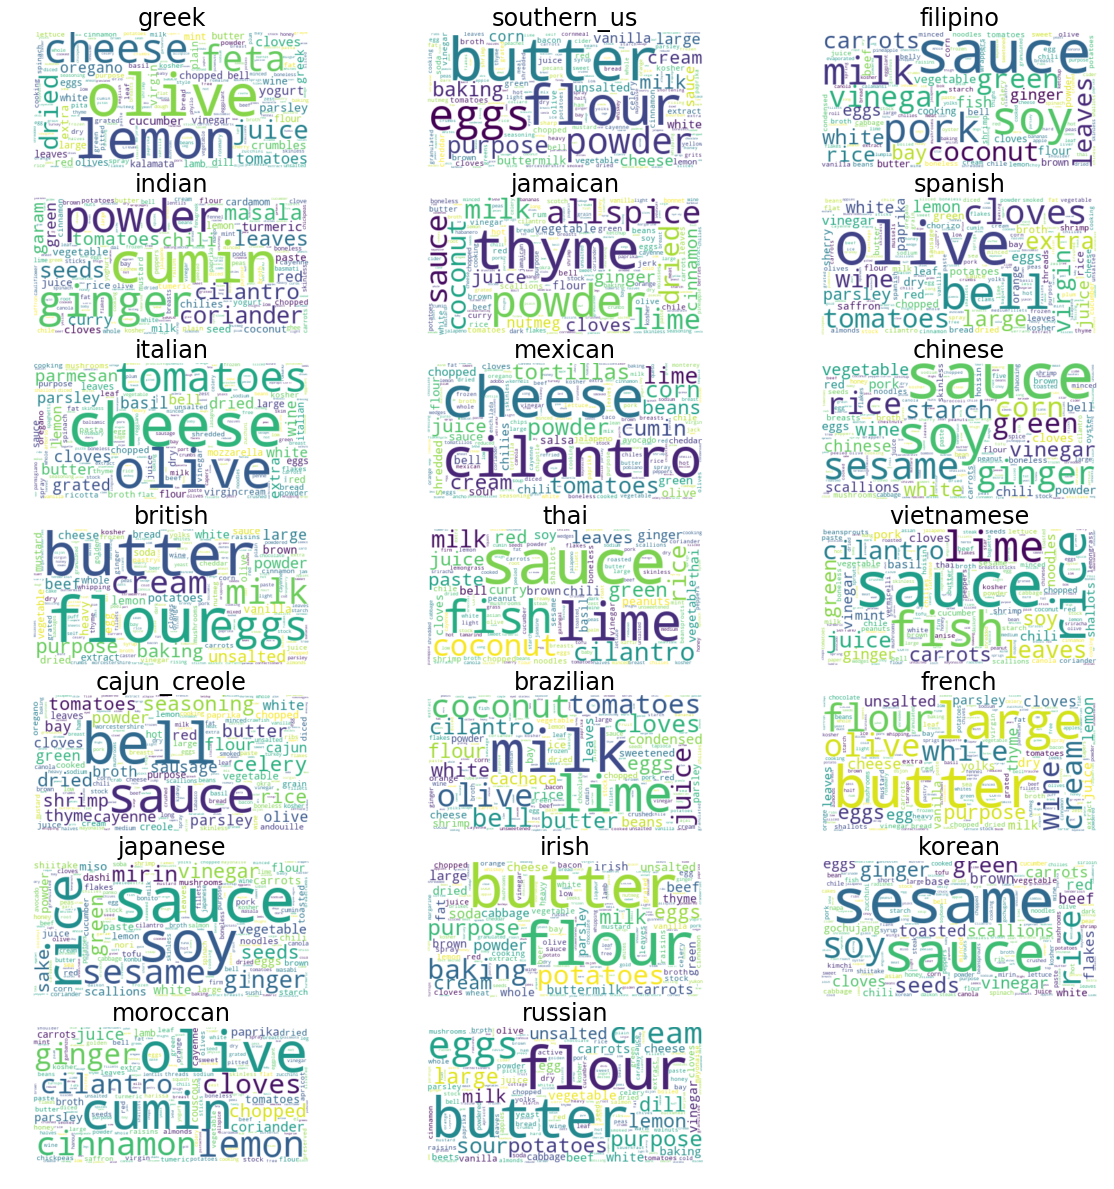

In [313]:
#visualize the most frequent ingredients by cuisine type
cuisine_ingredients = pd.DataFrame(columns=['all_ingredients'],index = train_set['cuisine'].unique())

list_items = train_set
remove = [x[0] for x in wordfreq.most_common(15)]
remove_stopwords(list_items['text_tokenized'],remove)

for n, cuisine in enumerate(train_set['cuisine'].unique()):
    a = []
    for i, val in enumerate(train_set['cuisine']):
        if cuisine == val:
            
            a.extend(list_items['text_tokenized'][i])      
    cuisine_ingredients.loc[cuisine,'all_ingredients'] = a
        
        
#print(cuisine_ingredients.head())

# figure of wordcloud
fig = plt.figure(figsize=(20,30))

all_ingredients = cuisine_ingredients.index
first_5 = all_ingredients

for i , items in enumerate(first_5):
    wc.generate_from_frequencies(Counter(cuisine_ingredients.loc[items,'all_ingredients']))
    fig.add_subplot(10,3,i+1)
    plt.imshow(wc,interpolation = 'bilinear')
    plt.axis('off')
    plt.title(items, fontsize = 24)